## Problem Statement: Predicting & Analysing Customer Churn using Machine Learning Algorithms

### Objective:
The objective of this project is to develop a predictive model using machine learning algorithms to identify potential customer churn in a banking/financial institution. Customer churn refers to the phenomenon where customers discontinue their association with a company, resulting in loss of revenue and business opportunities. By accurately predicting customer churn, the company can take proactive measures to retain valuable customers, thereby reducing customer attrition and improving overall business performance.

In [67]:
import pandas as pd

In [68]:
df = pd.read_csv(r"D:\Predictive analysis dataset\Churn_Modelling.csv")

In [69]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


#### The dataset provided consists of the following features:

- CustomerId: Unique identifier for each customer
- Surname: Surname of the customer
- CreditScore: Credit score of the customer
- Geography: Customer's country of residence
- Gender: Customer's gender
- Age: Age of the customer
- Tenure: Number of years the customer has been with the institution
- Balance: Bank account balance of the customer
- NumOfProducts: Number of products/services the customer has subscribed to
- HasCrCard: Whether the customer has a credit card (1 if yes, 0 if no)
- IsActiveMember: Whether the customer is an active member (1 if yes, 0 if no)
- EstimatedSalary: Estimated salary of the customer
- Exited: Whether the customer has churned (1 if yes, 0 if no)

## Exploratory Data Analysis and Pre-Processing

#### Handling Null Values

In [70]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [71]:
df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0], inplace=True)

In [72]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


### Country counting 

In [73]:
unique_countries = df['Geography'].nunique()
print("Number of unique countries:", unique_countries)
country_counts = df['Geography'].value_counts()
print("Unique countries and their counts:")
for country in country_counts.index:
    count = country_counts[country]
    print(country, count)

Number of unique countries: 3
Unique countries and their counts:
France 5015
Germany 2510
Spain 2477


In [74]:
gender_counts = df['Gender'].value_counts()
print("Number of males:", gender_counts['Male'])
print("Number of females:", gender_counts['Female'])

Number of males: 5458
Number of females: 4544


#### OneHot Encoding

In [75]:
d=df
df_encoded = pd.get_dummies(d, columns=['Geography', 'Gender'])
print(df_encoded.head())

   RowNumber  CustomerId   Surname  CreditScore   Age  Tenure    Balance  \
0          1    15634602  Hargrave          619  42.0       2       0.00   
1          2    15647311      Hill          608  41.0       1   83807.86   
2          3    15619304      Onio          502  42.0       8  159660.80   
3          4    15701354      Boni          699  39.0       1       0.00   
4          5    15737888  Mitchell          850  43.0       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1        1.0             1.0        101348.88       1   
1              1        0.0             1.0        112542.58       0   
2              3        1.0             0.0        113931.57       1   
3              2        0.0             0.0         93826.63       0   
4              1        1.0             1.0         79084.10       0   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                 1                 

In [76]:
df_encoded

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0,1,0,0,1
9999,9999,15682355,Sabbatini,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0,1,0,0,1
10000,10000,15628319,Walker,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0,1,0,0,1,0


#### Handling Outliers

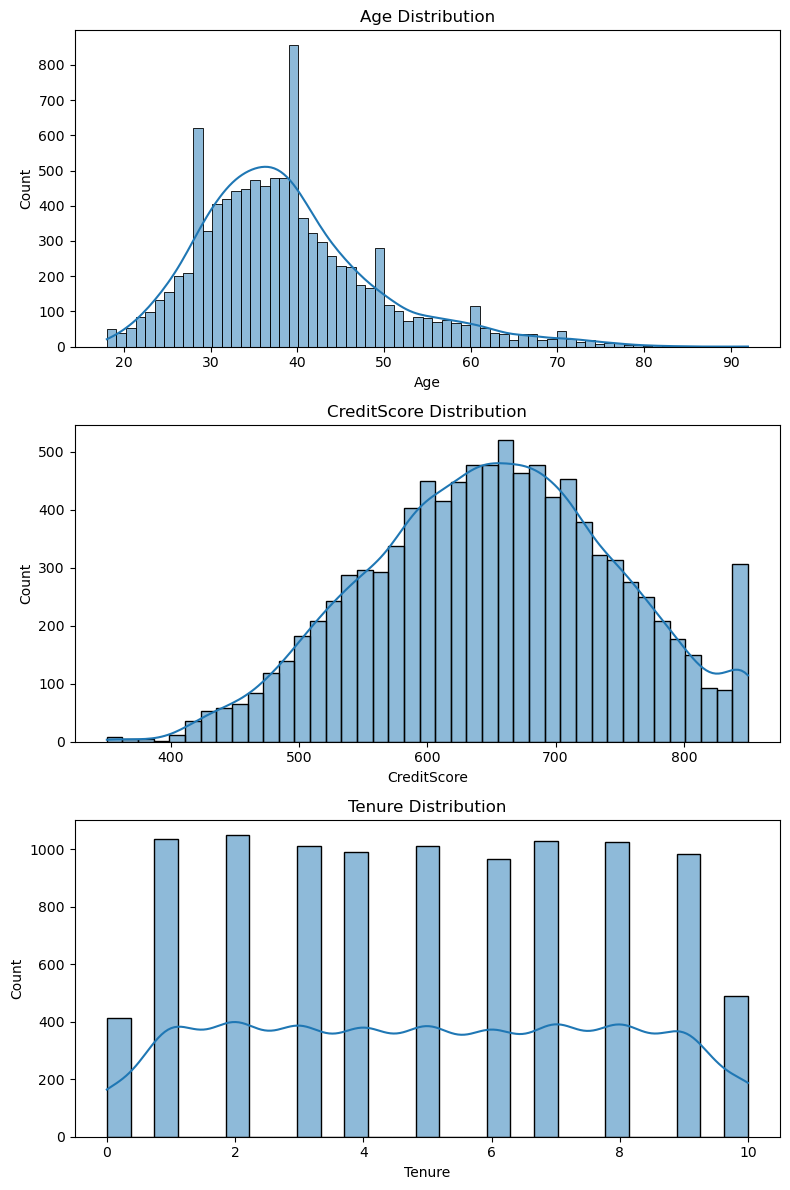

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot Age distribution
sns.histplot(data=df_encoded, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(data=df_encoded, x='CreditScore', kde=True, ax=axes[1])
axes[1].set_title('CreditScore Distribution')

# Plot Tenure distribution
sns.histplot(data=df_encoded, x='Tenure', kde=True, ax=axes[2])
axes[2].set_title('Tenure Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

#### Removal of Outliers

In [78]:
import numpy as np
z_scores = (df_encoded['Age'] - df_encoded['Age'].mean()) / df_encoded['Age'].std()
threshold = 3
outlier_mask = np.abs(z_scores) > threshold
outlier_mask

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001    False
Name: Age, Length: 10002, dtype: bool

In [79]:
df_encoded = df_encoded[~outlier_mask]

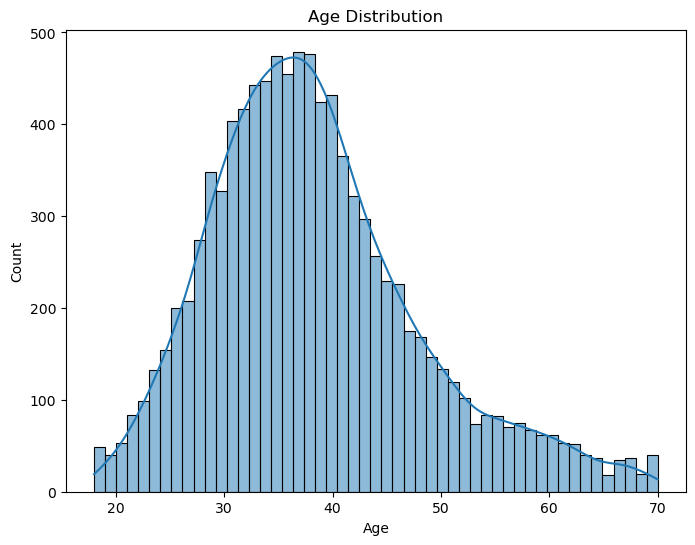

In [80]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_encoded, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

In [81]:
import numpy as np
z_scores1 = (df_encoded['CreditScore'] - df_encoded['CreditScore'].mean()) / df_encoded['CreditScore'].std()
threshold1 = 1
outlier_mask1 = np.abs(z_scores1) > threshold1
outlier_mask1

0        False
1        False
2         True
3        False
4         True
         ...  
9997     False
9998      True
9999      True
10000     True
10001     True
Name: CreditScore, Length: 9869, dtype: bool

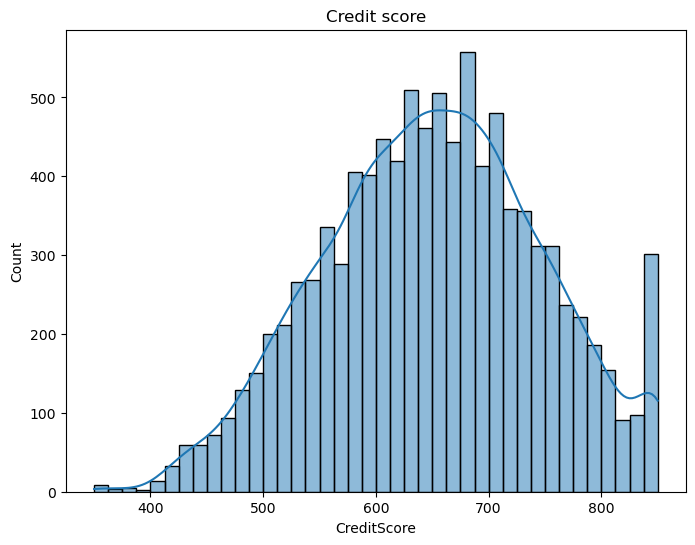

In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_encoded, x='CreditScore', kde=True)
plt.title('Credit score')
plt.show()

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

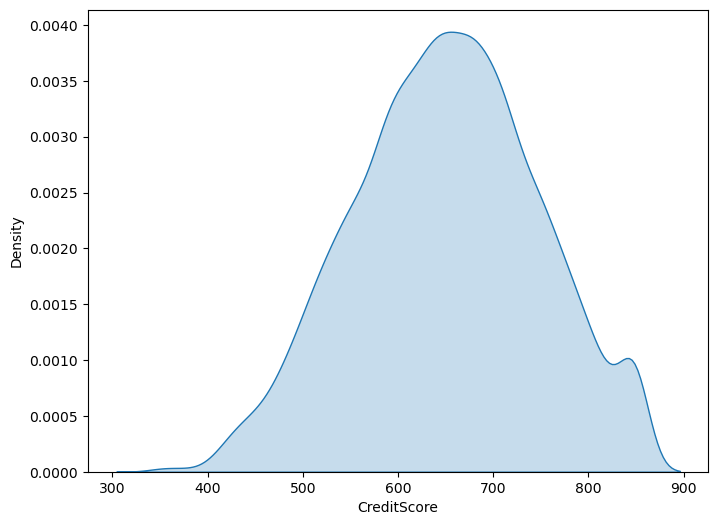

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=df, x='CreditScore', fill=True)

### Data Analysis

##### Churn Rate by Gender

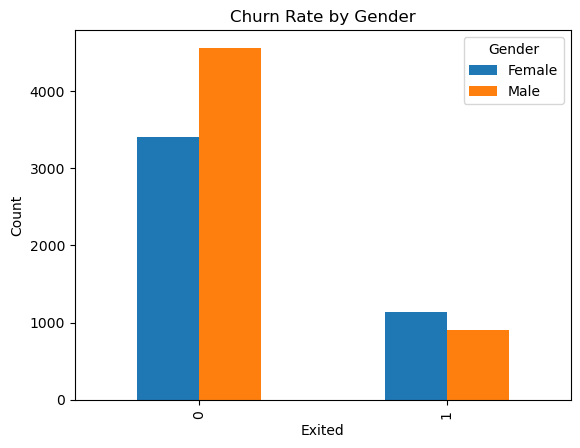

In [84]:
gender_churn_crosstab = pd.crosstab(df['Exited'], df['Gender'])

total_counts = gender_churn_crosstab.sum(axis=0)
gender_churn_percent = gender_churn_crosstab.div(total_counts) * 100

ax = gender_churn_crosstab.plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Churn Rate by Gender')
plt.legend(title='Gender')

plt.show()

##### Churn Rate by Estimated Salary

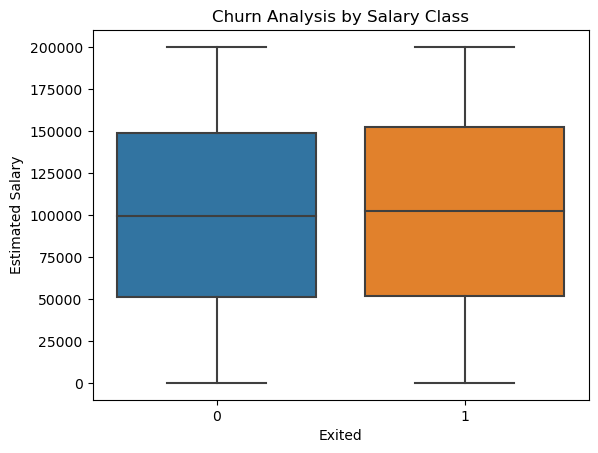

In [85]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df_encoded)
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.title('Churn Analysis by Salary Class')

# Show the plot
plt.show()

##### Churn Rate by Age Group 

In [86]:
# Defining the age groups/categories
age_bins = [18, 30, 40, 50, 60, 70, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

#creating a new column for age group
df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=age_bins, labels=age_labels)

C:\Users\jolin\AppData\Local\Temp\ipykernel_12720\2790778449.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=age_bins, labels=age_labels)


Text(0.5, 1.0, 'Churn Distribution by Age Group')

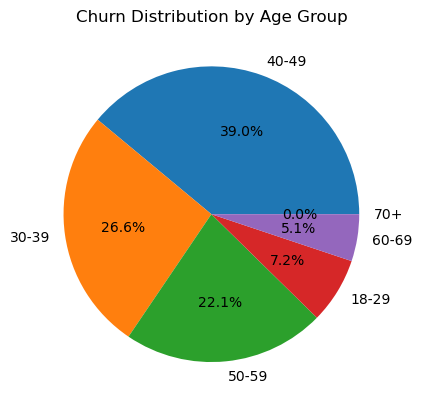

In [87]:
age_churn_count = df_encoded[df_encoded['Exited'] == 1]['AgeGroup'].value_counts()

#plotting a pie chart to analyse the churn rate
plt.pie(age_churn_count, labels=age_churn_count.index, autopct='%1.1f%%')
plt.title('Churn Distribution by Age Group')

##### Churn Rate Based on Location

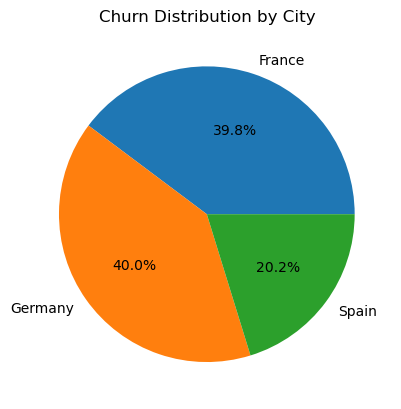

In [88]:
# Calculating the count of churns for each city
city_churn_count = [
    df_encoded[df_encoded['Geography_France'] == 1]['Exited'].sum(),
    df_encoded[df_encoded['Geography_Germany'] == 1]['Exited'].sum(),
    df_encoded[df_encoded['Geography_Spain'] == 1]['Exited'].sum()
]

# Defining the city labels
city_labels = ['France', 'Germany', 'Spain']

# Plot the pie chart
plt.pie(city_churn_count, labels=city_labels, autopct='%1.1f%%')
plt.title('Churn Distribution by City')

plt.show()

##### Churn Rate by Balance in the customer's account

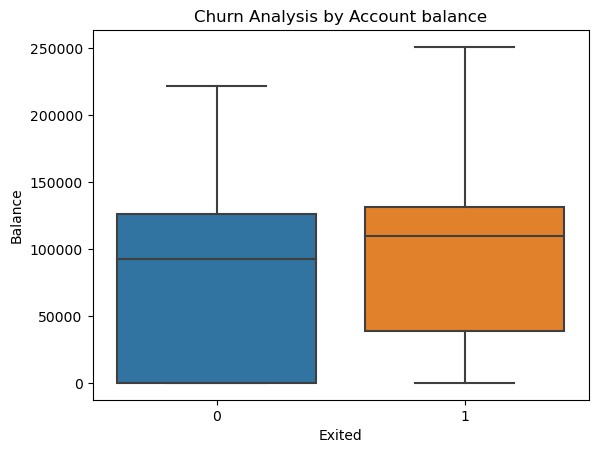

In [89]:
sns.boxplot(x='Exited', y='Balance', data=df_encoded)
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.title('Churn Analysis by Account balance')

# Show the plot
plt.show()

##### Churn rate by Number of Products a customer has subscription for

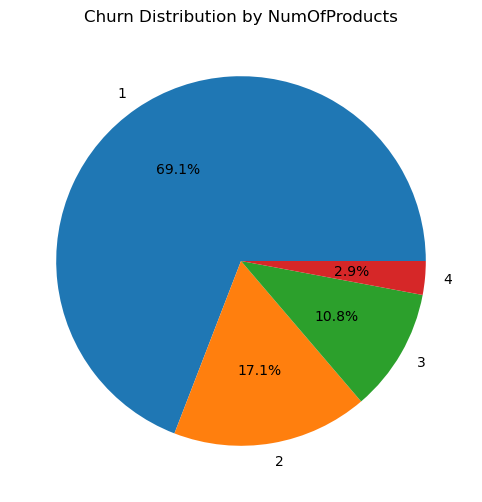

In [90]:
num_of_products_churn_count = df[df['Exited'] == 1]['NumOfProducts'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(num_of_products_churn_count, labels=num_of_products_churn_count.index, autopct='%1.1f%%')
plt.title('Churn Distribution by NumOfProducts')
plt.show()

##### Churn rate by analysing if a customer is a credit card holder

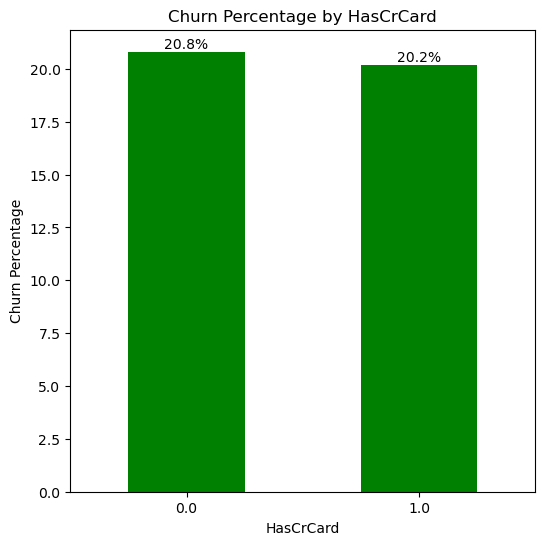

In [91]:
has_cr_card_churn_percentage = df[df['Exited'] == 1].groupby('HasCrCard')['Exited'].count() / df.groupby('HasCrCard')['Exited'].count() * 100

plt.figure(figsize=(6, 6))
ax = has_cr_card_churn_percentage.plot(kind='bar', color= 'green')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.xlabel('HasCrCard')
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by HasCrCard')
plt.xticks(rotation=0)
plt.show()

##### Churn rate by analysing if a customer is an active member of the bank

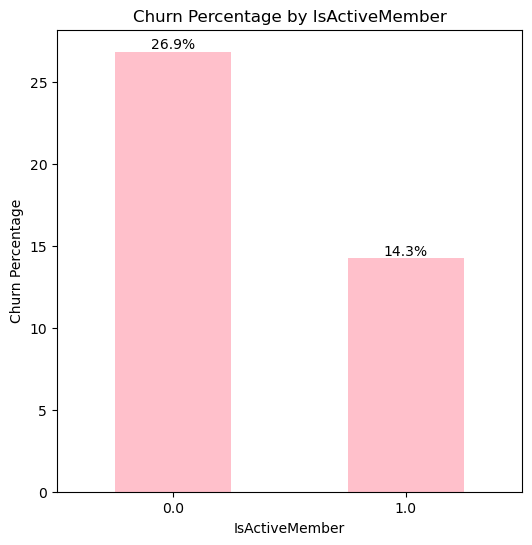

In [92]:
is_active_member_churn_percentage = df[df['Exited'] == 1].groupby('IsActiveMember')['Exited'].count() / df.groupby('IsActiveMember')['Exited'].count() * 100

plt.figure(figsize=(6, 6))
ax = is_active_member_churn_percentage.plot(kind='bar', color = 'pink')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.xlabel('IsActiveMember')
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by IsActiveMember')
plt.xticks(rotation=0)
plt.show()

### Predictive Analysis (Buliding Models using Machine Learning Algorithms)

##### Standardizing the data

In [93]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features to be standardized
numerical_features = df_encoded[['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Age', 'Tenure','Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']]

# Perform standardization on the selected features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

In [94]:
numerical_features

array([[-0.32459221, -1.22788651,  0.02189429, ..., -0.57419117,
         1.09721724, -1.09721724],
       [-0.43834015,  0.11549026,  0.21661206, ...,  1.74158025,
         1.09721724, -1.09721724],
       [-1.53445666,  1.33135566,  0.24077396, ..., -0.57419117,
         1.09721724, -1.09721724],
       ...,
       [ 1.25753823, -0.02448593, -0.12527621, ..., -0.57419117,
        -0.91139655,  0.91139655],
       [ 1.46435266,  0.85820423, -1.07675982, ..., -0.57419117,
         1.09721724, -1.09721724],
       [ 1.46435266,  0.85820423, -1.07675982, ..., -0.57419117,
         1.09721724, -1.09721724]])

### Logistic Regression

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [96]:
df_encoded

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,AgeGroup
0,1,15634602,Hargrave,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0,1,0,40-49
1,2,15647311,Hill,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1,1,0,40-49
2,3,15619304,Onio,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0,1,0,40-49
3,4,15701354,Boni,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0,1,0,30-39
4,5,15737888,Mitchell,850,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0,0,1,1,0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,1,0,0,1,0,30-39
9998,9999,15682355,Sabbatini,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0,1,0,0,1,40-49
9999,9999,15682355,Sabbatini,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0,1,0,0,1,40-49
10000,10000,15628319,Walker,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0,1,0,0,1,0,18-29


In [97]:
X= numerical_features
y= df_encoded['Exited']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [100]:
y_pred = model.predict(X_test)

##### Check for overfitting

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8115501519756839


In [102]:
train_r2 = model.score(X_train, y_train)
print("Train Accuracy:", train_r2)

Train Accuracy: 0.7997466751108296


##### Check for underfitting

In [103]:
from sklearn.metrics import mean_squared_error
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("MSE for training data:", mse_train)

MSE for training data: 0.20025332488917036


In [104]:
mse = mean_squared_error(y_test, y_pred)
print("MSE for test data:", mse)

MSE for test data: 0.1884498480243161


In [105]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual  Predicted
2904       0          0
2664       0          0
9638       1          1
9132       0          0
3355       0          0
...      ...        ...
3365       1          0
5725       0          0
9127       1          0
4129       1          0
819        0          0

[1974 rows x 2 columns]


##### Hyper parameter tunning

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params,best_model)

{'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'} LogisticRegression(C=0.1, solver='liblinear')


In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Select the numerical features to be standardized
numerical_features = df_encoded[['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Age', 'Tenure','Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']]

# Perform standardization on the selected features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

# Split the data into training and testing sets
X = numerical_features
y = df_encoded['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with the best hyperparameters
model = LogisticRegression(C=0.1, max_iter=100, solver='liblinear')

# Train the model on the entire training dataset
model.fit(X_train, y_train)

# Evaluate the model on the testing dataset
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8120567375886525


##### Graph to analyse the result of regression

In [109]:
predicted_1 = results[results['Predicted'] == 1]
print(predicted_1)

      Actual  Predicted
9638       1          1
538        1          1
489        0          1
4435       1          1
5336       1          1
...      ...        ...
9262       0          1
3610       1          1
6892       1          1
2495       1          1
7530       0          1

[133 rows x 2 columns]


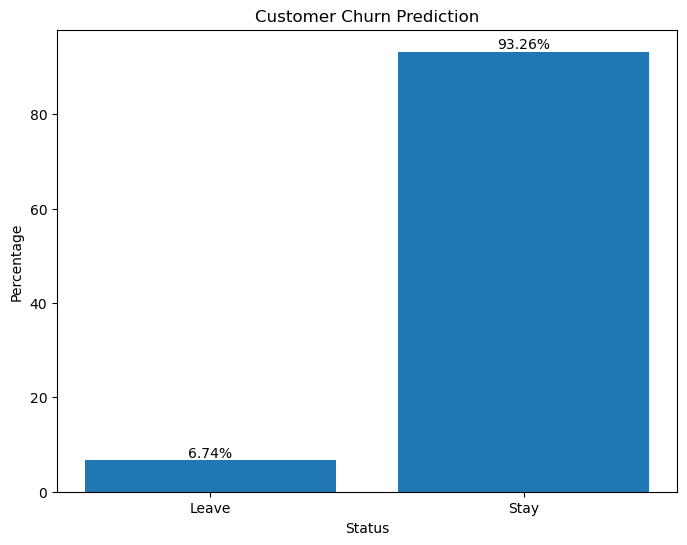

In [110]:
import matplotlib.pyplot as plt

# Count the number of predicted leave and stay
leave_count = len(predicted_1)
stay_count = len(results) - leave_count

# Calculate the percentages
leave_percentage = (leave_count / len(results)) * 100
stay_percentage = (stay_count / len(results)) * 100

# Create labels for the plot
labels = ['Leave', 'Stay']
percentages = [leave_percentage, stay_percentage]

# Plot the percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, percentages)
plt.title('Customer Churn Prediction')
plt.xlabel('Status')
plt.ylabel('Percentage')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentages[i]:.2f}%', ha='center', va='bottom')
plt.show()


### Random Forest 

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [113]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [114]:
y_pred = rf_classifier.predict(X_test)

In [115]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8596757852077


In [116]:
mserf = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Random Forest is (MSE):", mserf)

Mean Squared Error for Random Forest is (MSE): 0.1403242147922999


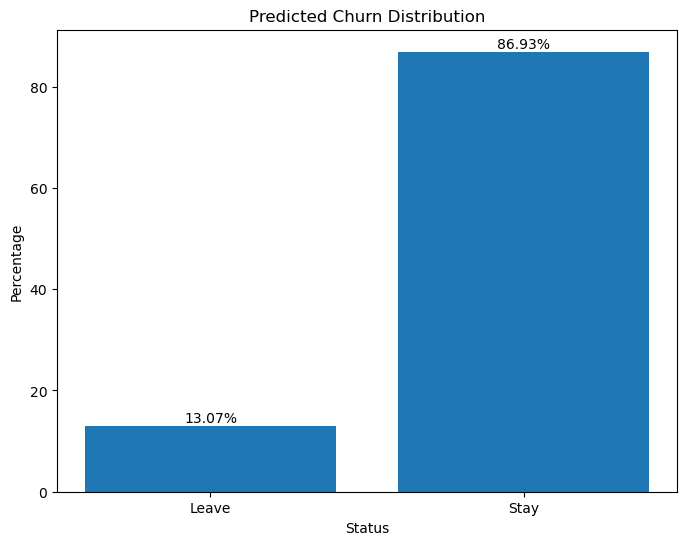

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the count of predicted "leave" and "stay"
predicted_leave_count = np.count_nonzero(y_pred == 1)
predicted_stay_count = np.count_nonzero(y_pred == 0)

# Calculate the total number of predictions
total_predictions = len(y_pred)

# Calculate the percentage of predicted "leave" and "stay"
predicted_leave_percentage = (predicted_leave_count / total_predictions) * 100
predicted_stay_percentage = (predicted_stay_count / total_predictions) * 100

# Create labels and percentages
labels = ['Leave', 'Stay']
percentages = [predicted_leave_percentage, predicted_stay_percentage]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages)
plt.title('Predicted Churn Distribution')
plt.xlabel('Status')
plt.ylabel('Percentage')

# Add percentage values as text annotations
for i in range(len(labels)):
    plt.text(i, percentages[i], f'{percentages[i]:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()


### Hyper Parameter Tunning 

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}


In [119]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=None, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8632218844984803


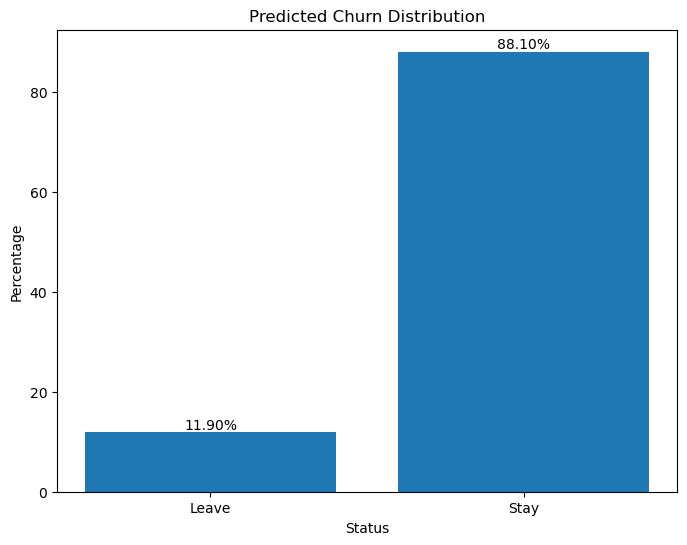

In [120]:

# Calculate the count of predicted "leave" and "stay"
predicted_leave_count = np.count_nonzero(y_pred == 1)
predicted_stay_count = np.count_nonzero(y_pred == 0)

# Calculate the total number of predictions
total_predictions = len(y_pred)

# Calculate the percentage of predicted "leave" and "stay"
predicted_leave_percentage = (predicted_leave_count / total_predictions) * 100
predicted_stay_percentage = (predicted_stay_count / total_predictions) * 100

# Create labels and percentages
labels = ['Leave', 'Stay']
percentages = [predicted_leave_percentage, predicted_stay_percentage]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages)
plt.title('Predicted Churn Distribution')
plt.xlabel('Status')
plt.ylabel('Percentage')

# Add percentage values as text annotations
for i in range(len(labels)):
    plt.text(i, percentages[i], f'{percentages[i]:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [121]:
mserf = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Random Forest is (MSE):", mserf)

Mean Squared Error for Random Forest is (MSE): 0.13677811550151975


#### Conclusion:
The logistic regression model achieved an accuracy of 81.20% and a mean squared error (MSE) of 18.79, while the random forest model performed better with an accuracy of 86.32% and an MSE of 13.67. Comparing the two models, the random forest model proves to be more suitable for predicting customer churn. It can capture complex churn patterns, handle a larger number of features without feature selection, and is robust to outliers. Additionally, the random forest model mitigates the risk of overfitting and provides better generalization. Considering its superior performance and advantages, the random forest model is recommended for predicting customer churn.